CV-Messung für kom. LED

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

ordner_pfad = '/Users/naebaekhap/FP_Protokoll_Kim/FP_Messdaten/F13/Messdaten/3.Aufgabe'

dateien = [f for f in os.listdir(ordner_pfad) if f.endswith('.csv')]

plt.figure(figsize=(8, 6))  # Erstelle eine Figure für die Plots

# Zuordnung von Dateinamen zu Farben
info = {
    'CV_rot.csv': {'farbe': 'red', 'label': 'LED Rot'},
    'CV_orange.csv': {'farbe': 'orange', 'label': 'LED Orange'},
    'CV_gruen.csv': {'farbe': 'green', 'label': 'LED Grün'},   
    'CV_weiss.csv': {'farbe': 'black', 'label': 'LED Weiß'}
}

for datei in dateien:
    # Vollständiger Pfad zur Datei
    voller_pfad = os.path.join(ordner_pfad, datei)
    
    # Lese die CSV-Datei, überspringe die ersten zwei Zeilen und setze den Delimiter auf Tab
    daten = pd.read_csv(voller_pfad, delimiter='\t', skiprows=2, header=None)
    
    # Spaltennamen manuell
    daten.columns = ['Frequency', 'Capacitance', 'Resistance', 'VAC', 'IAC', 'VDC', 'IDC', 'Time', 'Impedance', 'Temperature']
    
    # Berechne 1/C^2 
    daten['1/C^2'] = 1 / daten['Capacitance']**2

    farbe = info[datei]['farbe']
    label = info[datei]['label']
    
    # 라인
    plt.plot(daten['VDC'], daten['1/C^2'], color=farbe)
    
    # 점점이 알파 값으로 투명도
    plt.scatter(daten['VDC'], daten['1/C^2'], color=farbe, edgecolor='grey', alpha=0.5, s=20, label=f'Scatter {label}')

  # Führe eine lineare Regression durch
# Führe eine lineare Regression durch
    fit_params = np.polyfit(daten['VDC'], daten['1/C^2'], 1)
    a, b = fit_params[0], fit_params[1]
    fit_line = a * daten['VDC'] + b

        # Zeichne die Fit-Linie
    plt.plot(daten['VDC'], fit_line, label=f"Fit: {info[datei]['label']}", color=info[datei]['color'], linestyle='--')

        # Ausgabe der Fit-Parameter
    print(f"Fit für {info[datei]['label']}: a = {a:.4f}, b = {b:.4e}")



plt.title('C-V Messungen für kommerziellen LEDs')
plt.xlabel('Spannung (V)')
plt.ylabel('1/C² (1/F²)')
plt.legend()
plt.grid(True)
plt.show()

print.

SyntaxError: invalid syntax (732568048.py, line 63)

Fläche A Berechnung
Für die Figuren: 

In [9]:
def berechne_l_form_fläche(breite1, höhe1, breite2, höhe2):
    """
    Berechnet die Fläche einer L-förmigen Figur, die aus zwei Rechtecken besteht.
    
    Parameters:
    breite1, höhe1: Breite und Höhe des ersten Rechtecks
    breite2, höhe2: Breite und Höhe des zweiten Rechtecks
    
    Returns:
    Fläche der L-förmigen Figur
    """
    fläche1 = breite1 * höhe1
    fläche2 = breite2 * höhe2
    
    # Gesamtfläche berechnen, abhängig von der Positionierung der Rechtecke
    # Hier wird angenommen, dass sich die Rechtecke so überlappen, dass keine Fläche doppelt gezählt wird.
    gesamtfläche = fläche1 + fläche2
    
    return gesamtfläche

# Beispiel: Eingabe der Dimensionen
breite1 = 383.14  # Breite des ersten Rechtecks in Metern
höhe1 = 165.20  # Höhe des ersten Rechtecks in Metern
breite2 = 166.19  # Breite des zweiten Rechtecks in Metern
höhe2 = 382.62 - höhe1    # Höhe des zweiten Rechtecks in Metern

# Fläche berechnen
fläche = berechne_l_form_fläche(breite1, höhe1, breite2, höhe2)
print(f"Die Fläche der L-förmigen Figur beträgt {fläche} Quadratmikrometer.")

Die Fläche der L-förmigen Figur beträgt 99427.75779999999 Quadratmikrometer.


Für Quadrat

In [8]:
def berechne_quadrat_fläche(seitenlänge):
    """
    Berechnet die Fläche eines Quadrats anhand seiner Seitenlänge.
    
    Parameters:
    seitenlänge: Die Länge der Seiten des Quadrats
    
    Returns:
    Fläche des Quadrats
    """
    fläche = seitenlänge ** 2
    return fläche

# Liste von Seitenlängen für mehrere Quadrate
seitenlängen = [211.24, 161.88, 112.08]

# Berechne und drucke die Fläche für jede Seitenlänge
for länge in seitenlängen:
    fläche = berechne_quadrat_fläche(länge)
    print(f"Die Fläche des Quadrats mit der Seitenlänge {länge} beträgt {fläche} Quadratmeter.")

Die Fläche des Quadrats mit der Seitenlänge 211.24 beträgt 44622.337600000006 Quadratmeter.
Die Fläche des Quadrats mit der Seitenlänge 161.88 beträgt 26205.1344 Quadratmeter.
Die Fläche des Quadrats mit der Seitenlänge 112.08 beträgt 12561.9264 Quadratmeter.


Raumladungszonenbereite W=A/C

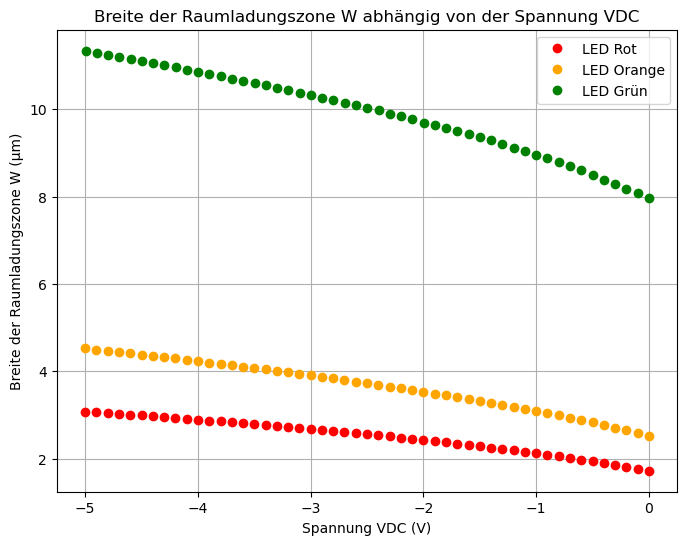

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

ordner_pfad = '/Users/naebaekhap/FP_Protokoll_Kim/FP_Messdaten/F13/Messdaten/3.Aufgabe'
# Konstanten definieren
permittivity = {
    'GaAs': 13.1 * 8.854e-12,  # Permittivität von GaAs in F/m
    'GaN': 8.9 * 8.854e-12    # Permittivität von GaN in F/m
}

# Flächen in Quadratmeter umrechnen (von Quadratmikrometern)
areas = {
    'CV_rot.csv': 921600 * 1e-12,  # umgerechnet in m^2
    'CV_orange.csv': 1000000 * 1e-12,
    'CV_gruen.csv': 2250000 * 1e-12
}

# Materialtyp und Farbe für jede LED zuordnen
material_color_map = {
    'CV_rot.csv': {'material': 'GaAs', 'color': 'red', 'label': 'LED Rot'},
    'CV_orange.csv': {'material': 'GaAs', 'color': 'orange', 'label': 'LED Orange'},
    'CV_gruen.csv': {'material': 'GaN', 'color': 'green', 'label': 'LED Grün'}
}

# Liste alle CSV-Dateien im Ordner
dateien = [f for f in os.listdir(ordner_pfad) if f.endswith('.csv')]

plt.figure(figsize=(8, 6))  # Erstelle eine Figure für die Plots

for datei in dateien:
    if datei in material_color_map:  # Überprüfe, ob die Datei im Dictionary definiert ist
        voller_pfad = os.path.join(ordner_pfad, datei)
        daten = pd.read_csv(voller_pfad, delimiter='\t', skiprows=2, header=None)
        daten.columns = ['Frequency', 'Capacitance', 'Resistance', 'VAC', 'IAC', 'VDC', 'IDC', 'Time', 'Impedance', 'Temperature']

        # Berechne W in Mikrometern
        material_info = material_color_map[datei]
        epsilon = permittivity[material_info['material']]
        area = areas[datei]  # Fläche der jeweiligen LED
        daten['W (um)'] = (epsilon * area / daten['Capacitance']) * 1e6  # W in Mikrometern

        # Plotte die Daten
        plt.plot(daten['VDC'], daten['W (um)'], label=material_info['label'], marker='o', linestyle='', color=material_info['color'])

plt.title('Breite der Raumladungszone W abhängig von der Spannung VDC')
plt.xlabel('Spannung VDC (V)')
plt.ylabel('Breite der Raumladungszone W (µm)')
plt.legend()
plt.grid(True)
plt.show()